### Reconstruction of Image A with nnf obtained from Image A and Image B.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from nnf import NNF

In [3]:
def reconstruct_img(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image using the nearest neighbor field
    """
    h, w = img1.shape[:2]
    output = img1.copy()
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()

    for ay in range(h):
        for ax in range(w):
            by, bx = nnf[ay, ax]
            
            if not patch_match._in_border(ax, ay):

                output[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] = \
                    img2[by - patch_w//2:by + patch_w//2 + 1, bx - patch_w//2:bx + patch_w//2 + 1]
                

    return output

In [12]:
def reconstruct_img_average(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image by averaging pixels from all the patches it is a part of.
    """
    h, w = img1.shape[:2]
    output = np.zeros_like(img1, dtype=np.float32)
    count = np.zeros_like(img1, dtype=np.float32)
    
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()
    
    for ay in range(h):
        for ax in range(w):
            by, bx = nnf[ay, ax]

            if not patch_match._in_border(ax, ay):
            
                output[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] += \
                    img2[by - patch_w//2:by + patch_w//2 + 1, bx - patch_w//2:bx + patch_w//2 + 1]
            
                count[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] += 1
    
    output /= count
        
    return output.astype(np.uint8)


In [4]:
def plot_reconstructed_images(img1, img2, recon):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image A')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Image B')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Reconstructed Image A using Image B')
    ax[2].axis('off')

    plt.show()

In [5]:
a = cv2.imread('../images/a.png')
b = cv2.imread('../images/b.png')

In [6]:
recon_a = reconstruct_img(a, b)

In [13]:
recon_a_using_avg = reconstruct_img_average(a, b)

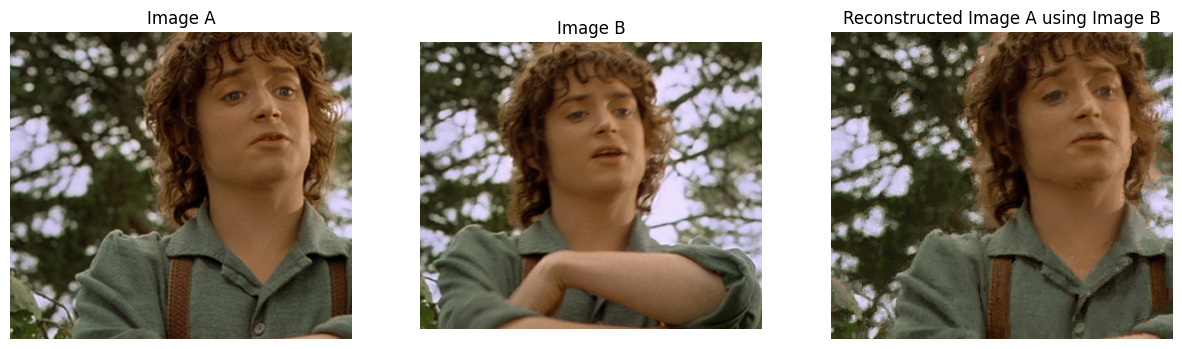

In [7]:
plot_reconstructed_images(a, b, recon_a)


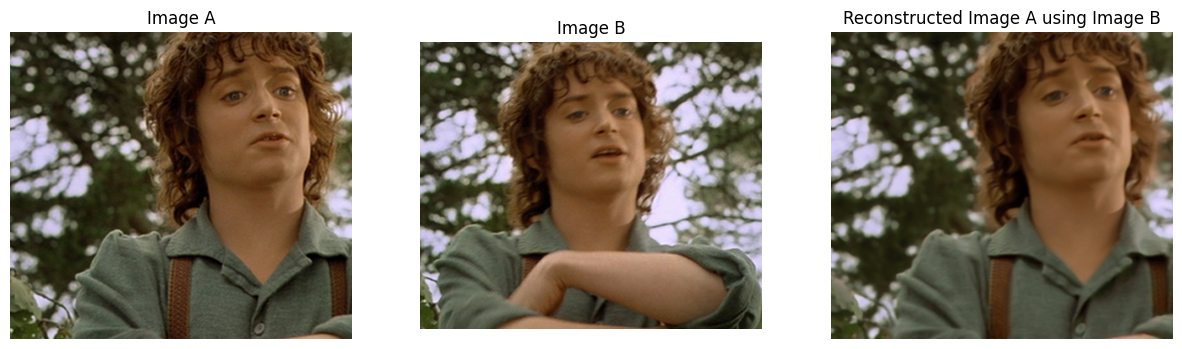

In [14]:
plot_reconstructed_images(a, b, recon_a_using_avg)

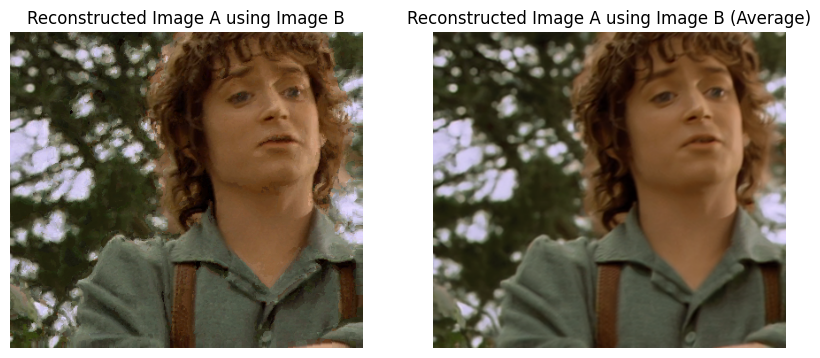

In [15]:
# compare the two methods
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_a_using_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()